In [2]:
import pyomo.environ as pyo
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import geopandas as gpd
from hydro_opt import hydro_opt

In [3]:
high_demand = hydro_opt(h2_demand = 337500000, nh3_demand = 17500000, ch3oh_demand = 17000000)
#high_demand = hydro_opt(h2_demand = 675000000, nh3_demand = 35000000, ch3oh_demand = 34000000)
high_demand.optimize()

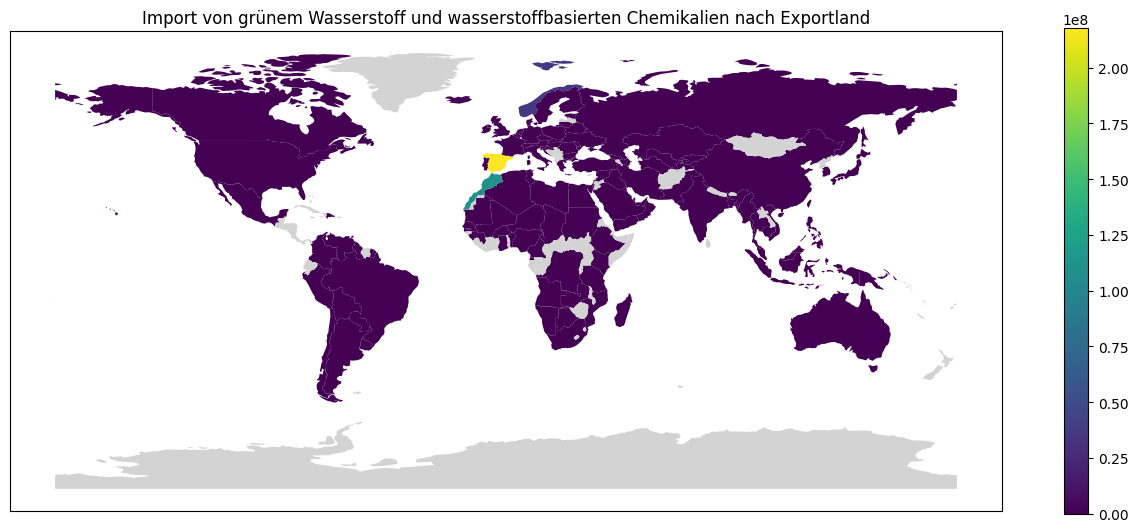

In [3]:
high_demand.visualize()

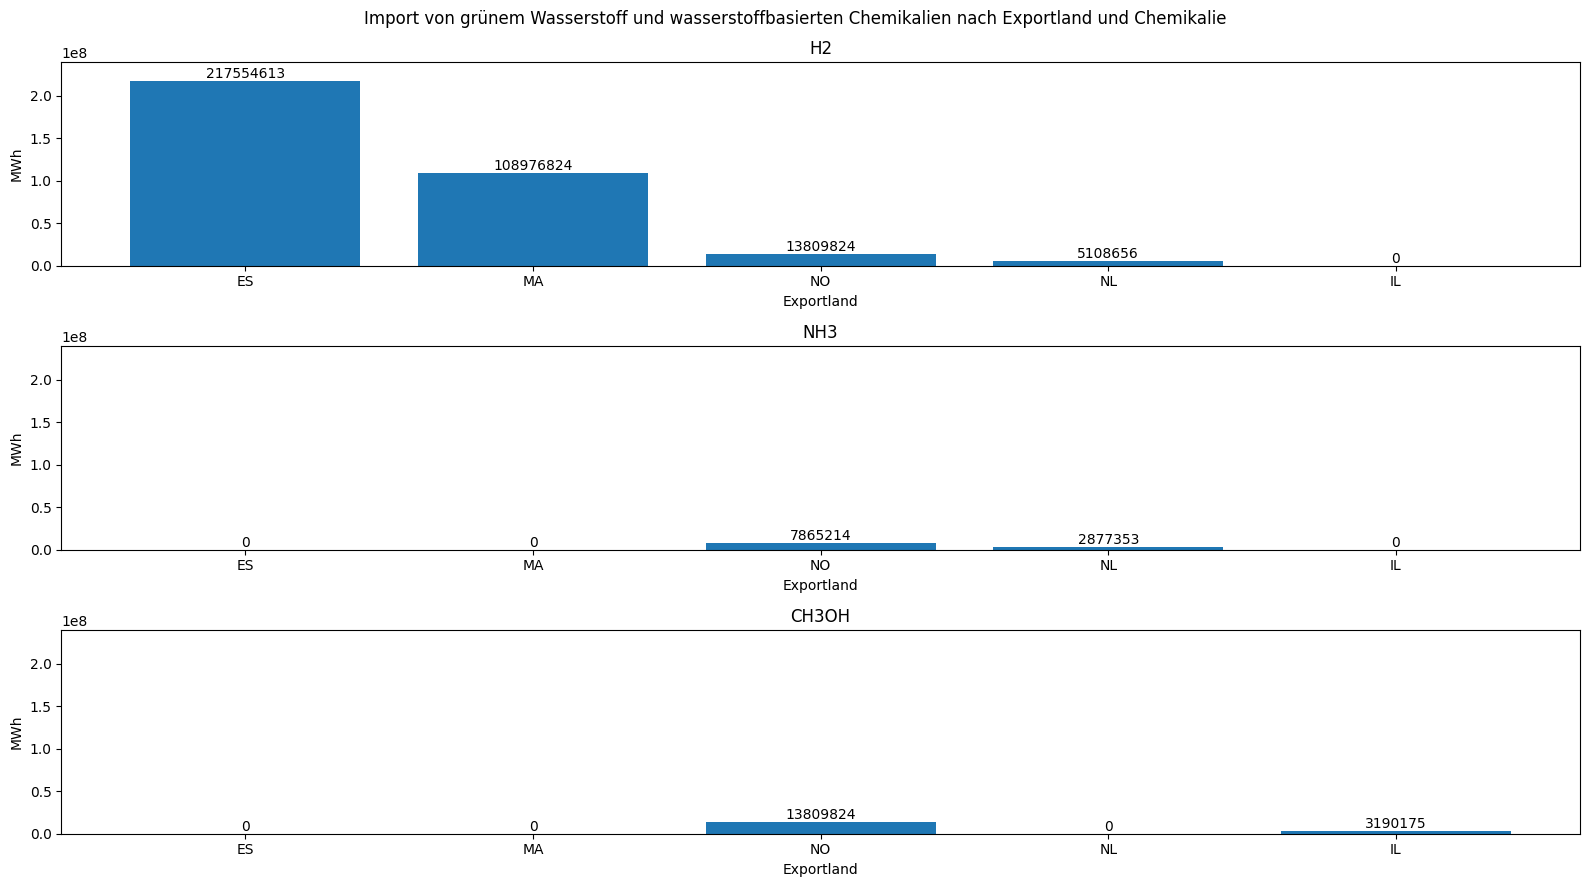

In [13]:
high_demand.visualize("commodities", vis_style="bar")
plt.savefig("Nachfrage - Chemikalien - ohne Importlimits", bbox_inches="tight")

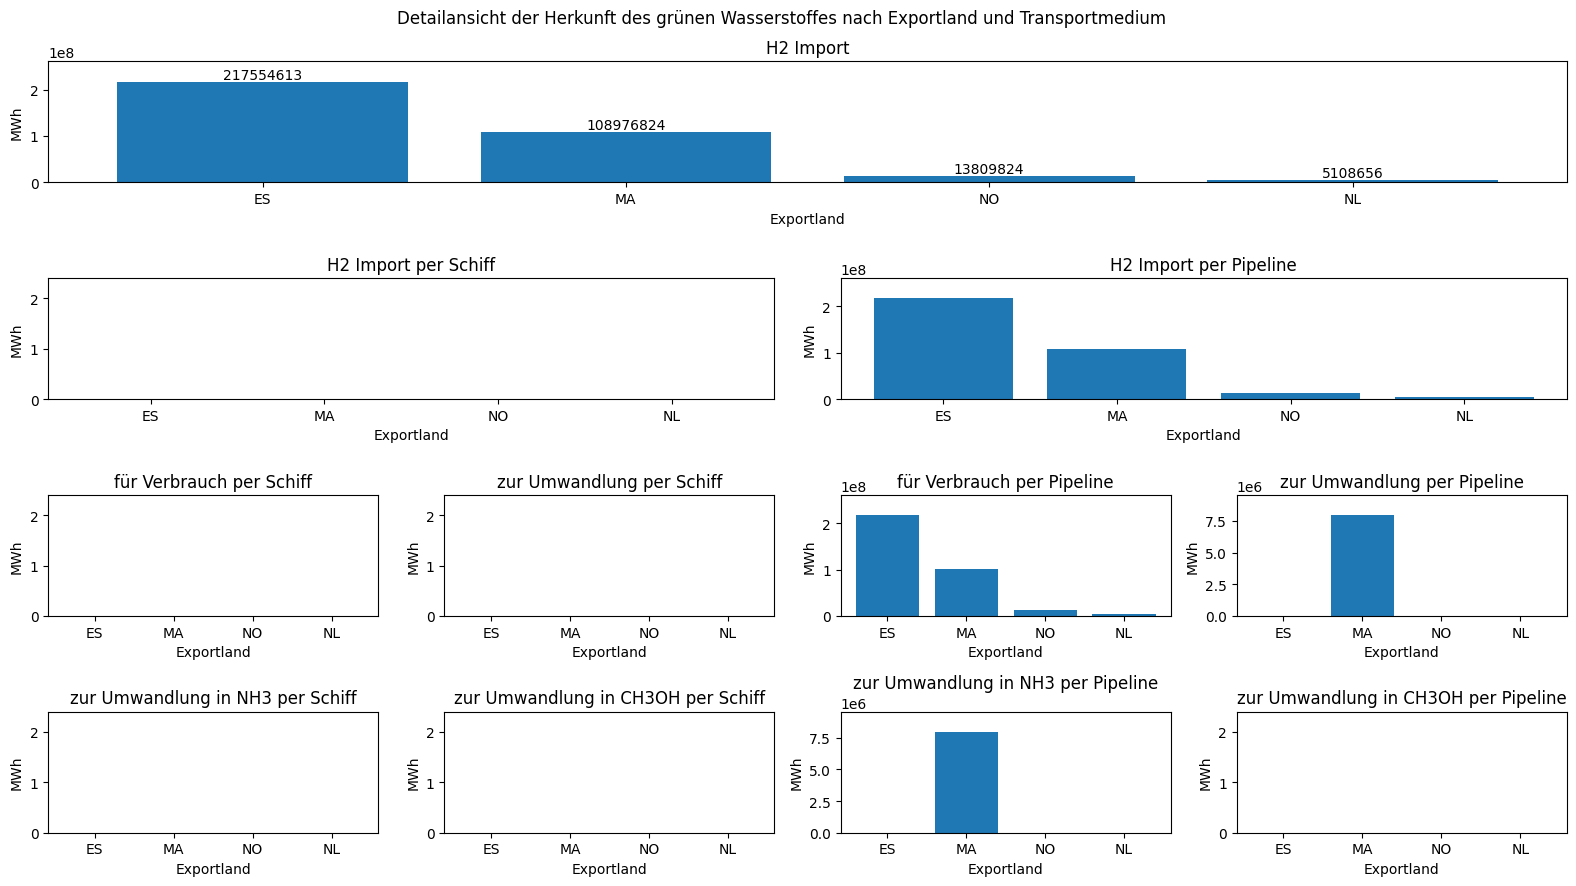

In [14]:
high_demand.visualize("hydrogen_conversion", vis_style="bar")
plt.savefig("Nachfrage - Wasserstoff Detail - ohne Importlimits", bbox_inches="tight")

In [4]:
high_demand_import_limits = hydro_opt(h2_demand = 337500000, nh3_demand = 17500000, ch3oh_demand = 17000000, use_import_limits = True, h2_ship_limit = 832200000)
#high_demand_import_limits = hydro_opt(h2_demand = 675000000, nh3_demand = 35000000, ch3oh_demand = 34000000, use_import_limits = True, h2_ship_limit = 832200000)
high_demand_import_limits.optimize()

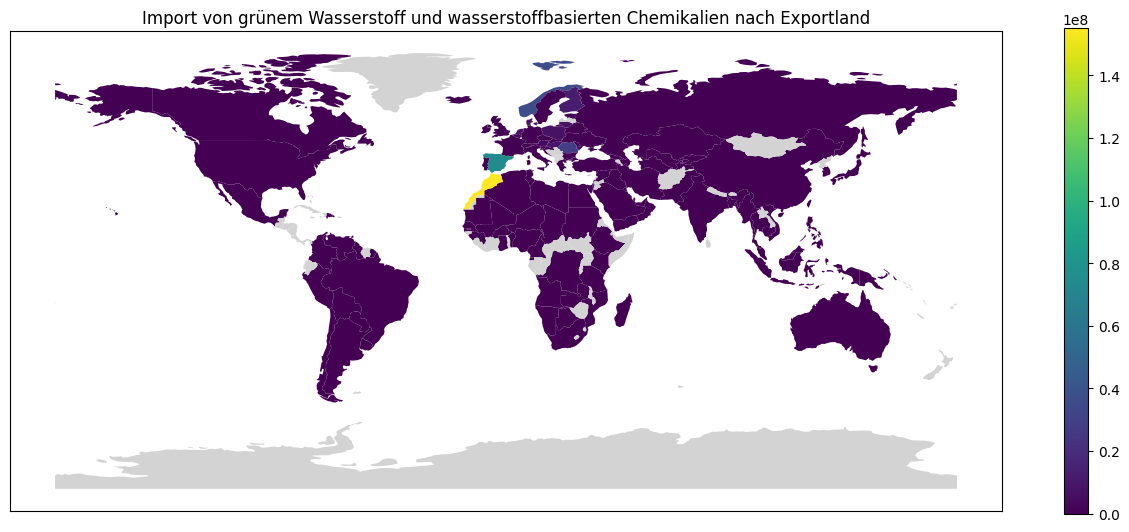

In [6]:
high_demand_import_limits.visualize()

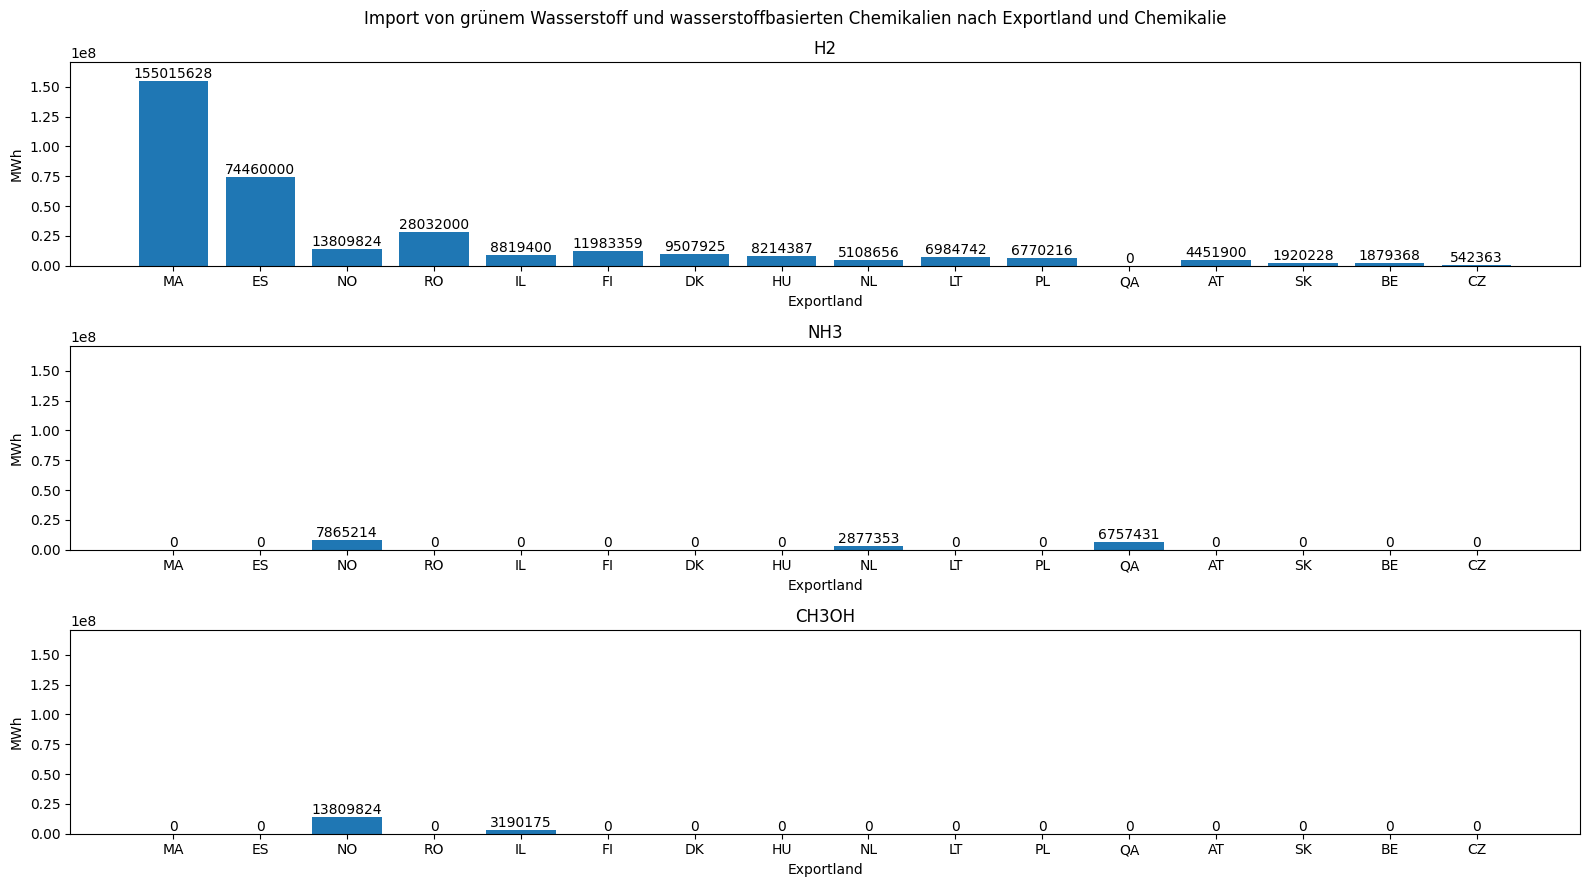

In [15]:
high_demand_import_limits.visualize("commodities", vis_style="bar")
plt.savefig("Nachfrage - Chemikalien - mit Importlimits", bbox_inches="tight")

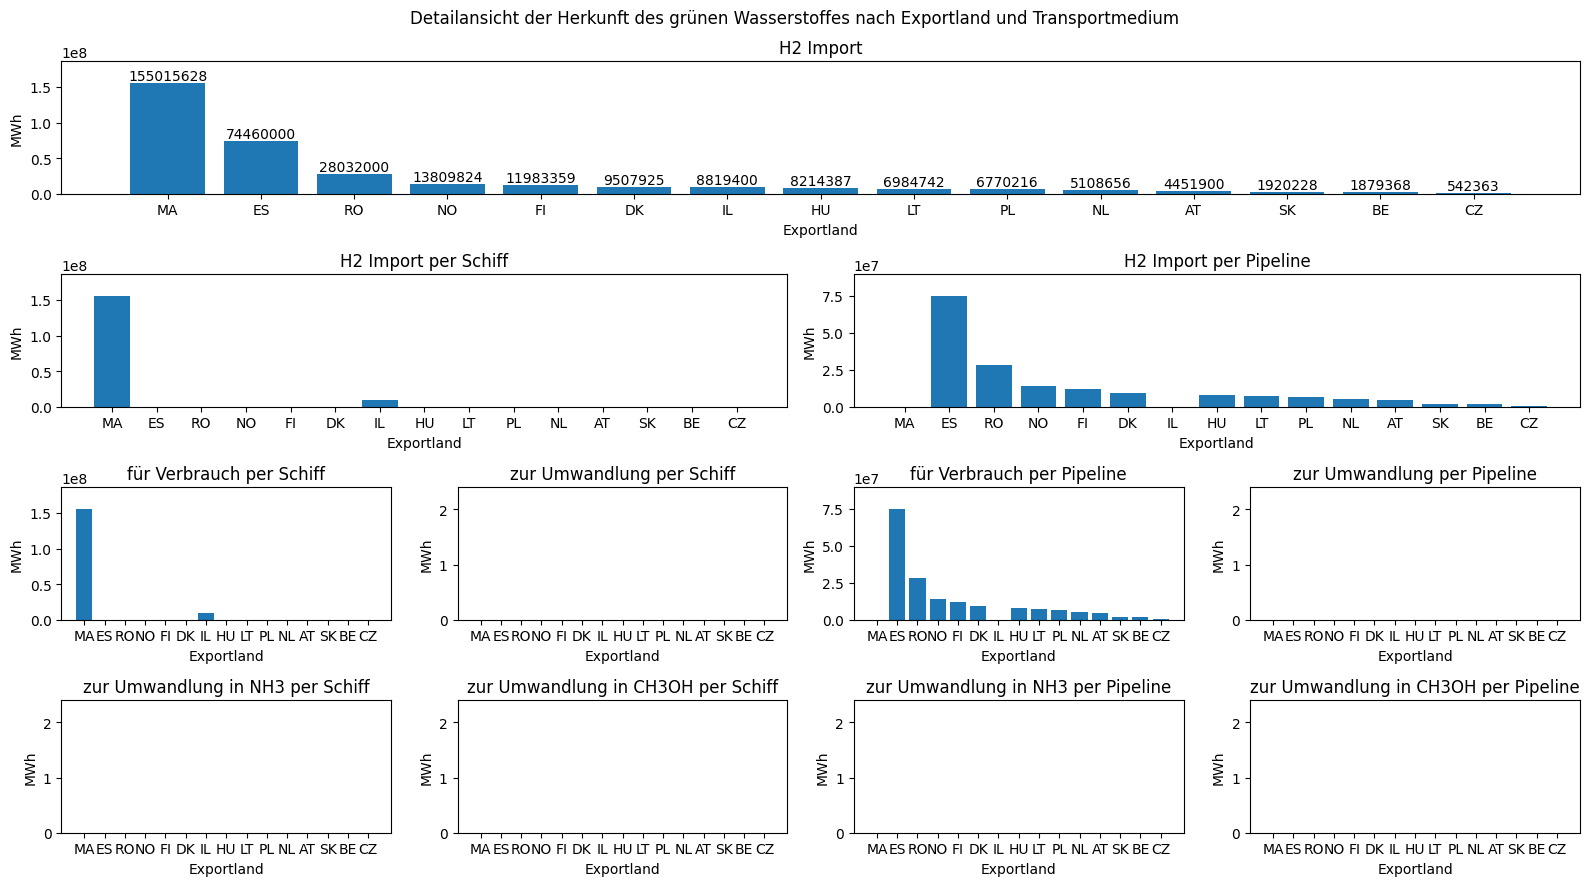

In [16]:
high_demand_import_limits.visualize("hydrogen_conversion", vis_style="bar")
plt.savefig("Nachfrage - Wasserstoff Detail - mit Importlimits", bbox_inches="tight")

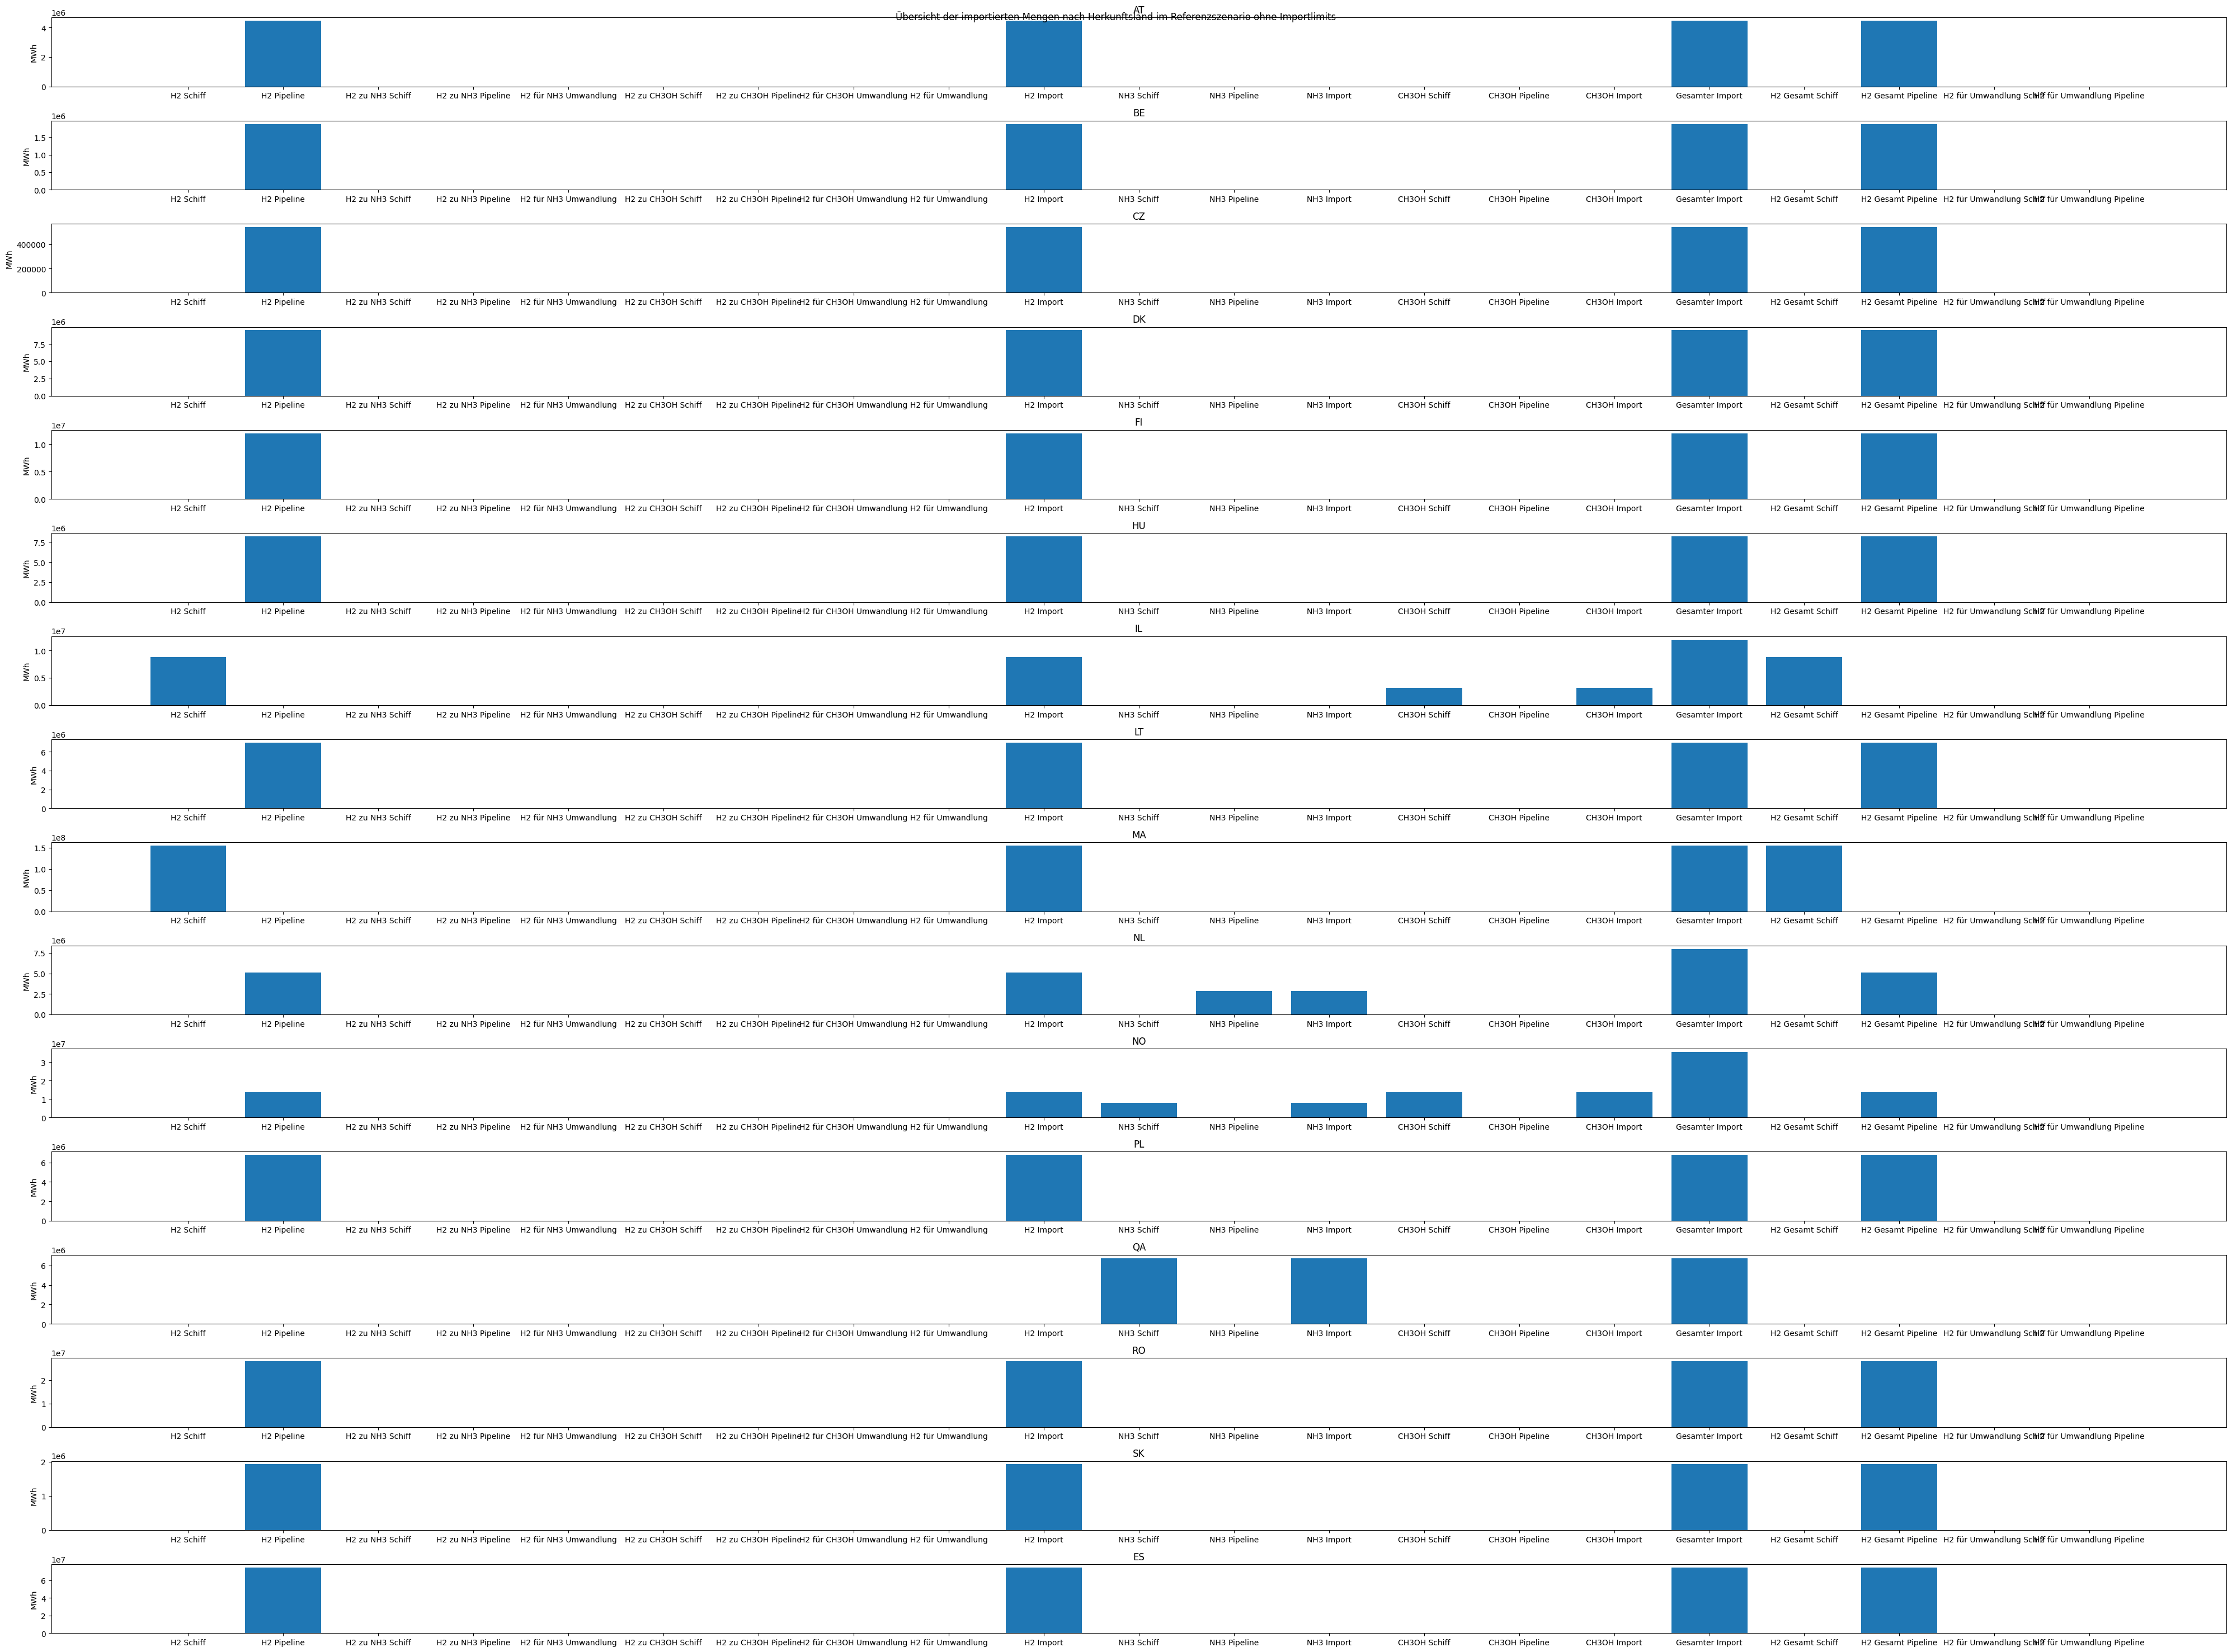

In [33]:
df = high_demand_import_limits.results_df[(high_demand_import_limits.results_df > 0).any(axis=1)]
fig, ax = plt.subplots(len(df), 1, figsize=(40,30))
plt.suptitle("Übersicht der importierten Mengen nach Herkunftsland im Referenzszenario ohne Importlimits")
for i in range(len(df)):
    values = df.iloc[[i]]
    ax[i].bar(values.columns, df.iloc[i].values)
    ax[i].set_ylabel("MWh")
    ax[i].set_title(df.iloc[[i]].index[0])
plt.tight_layout()

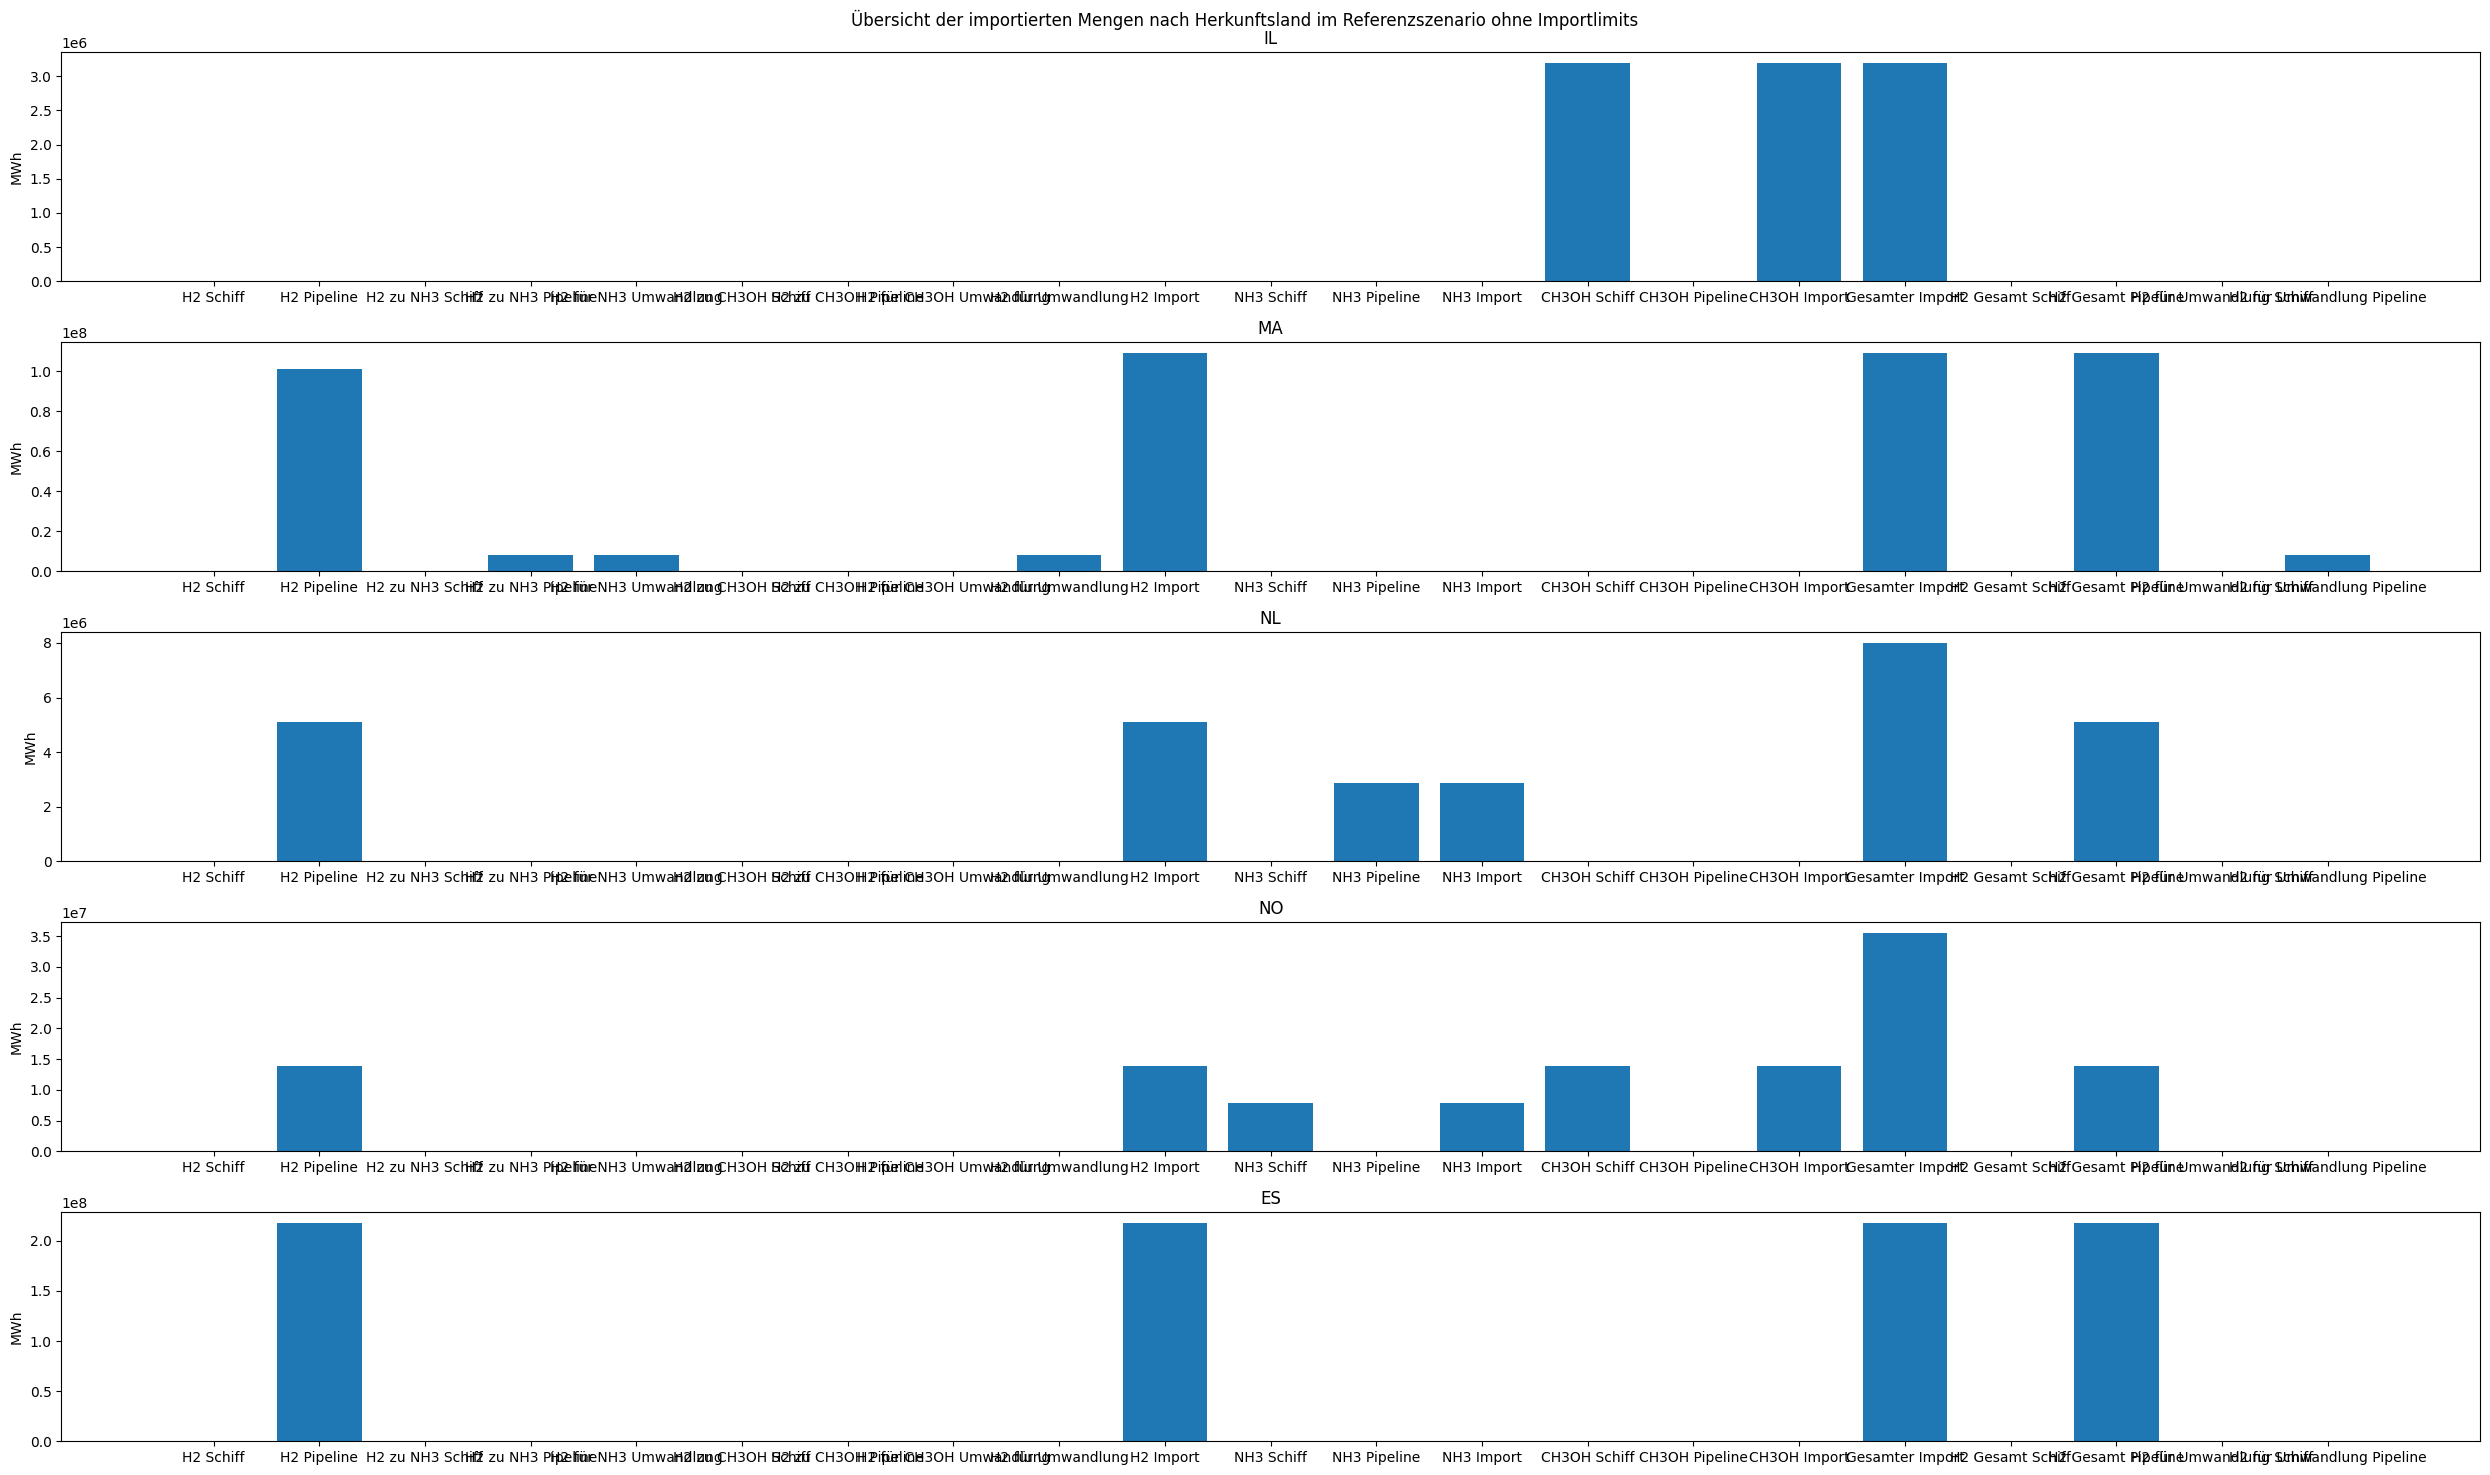

In [28]:
df = high_demand.results_df[(high_demand.results_df > 0).any(axis=1)]
fig, ax = plt.subplots(len(df), 1, figsize=(25,15))
plt.suptitle("Übersicht der importierten Mengen nach Herkunftsland im Referenzszenario ohne Importlimits")
for i in range(len(df)):
    values = df.iloc[[i]]
    ax[i].bar(values.columns, df.iloc[i].values)
    ax[i].set_ylabel("MWh")
    ax[i].set_title(df.iloc[[i]].index[0])
plt.tight_layout()

In [12]:
demand = 0
demand_list = []
countries_list= []
while 0 <= demand <= 337500000:
    model = hydro_opt(h2_demand = demand)
    model.optimize()
    df = model.results_df[(model.results_df > 0).any(axis=1)]
    demand_list.append(demand)
    countries_list.append(len(df))
    demand += 1000000

In [13]:
demand_list_in_twh = [x/1000000 for x in demand_list]

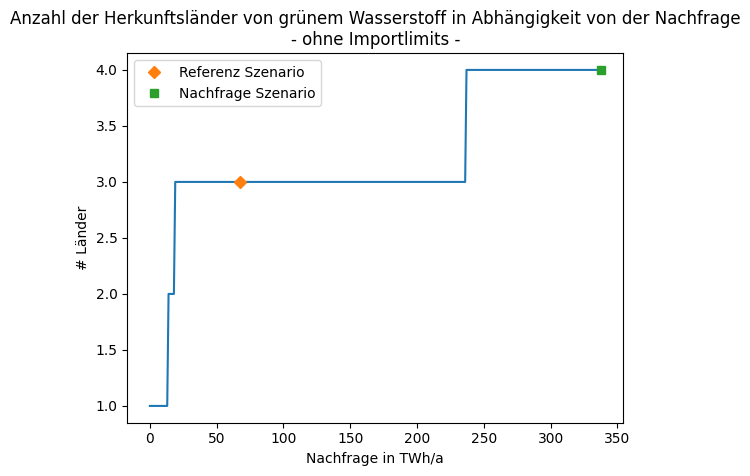

In [18]:
fig, ax = plt.subplots()

ax.set_title("Anzahl der Herkunftsländer von grünem Wasserstoff in Abhängigkeit von der Nachfrage\n- ohne Importlimits -")

ax.plot(demand_list_in_twh, countries_list)
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_ylabel("# Länder")
ax.set_xlabel("Nachfrage in TWh/a")
ax.plot(67.5,3, "D", label='Referenz Szenario')
ax.plot(337.5,4, "s", label='Nachfrage Szenario')
ax.legend()
#plt.savefig("Nachfrage - Anzahl Länder - ohne Importlimits", bbox_inches="tight")
plt.show()

In [15]:
demand = 0
demand_list_limits = []
countries_list_limits= []
while 0 <= demand <= 337500000:
    model = hydro_opt(h2_demand = demand, use_import_limits = True, h2_ship_limit = 832200000)
    model.optimize()
    df = model.results_df[(model.results_df > 0).any(axis=1)]
    demand_list_limits.append(demand)
    countries_list_limits.append(len(df))
    demand += 1000000

In [16]:
demand_list_limits_in_twh = [x/1000000 for x in demand_list_limits]

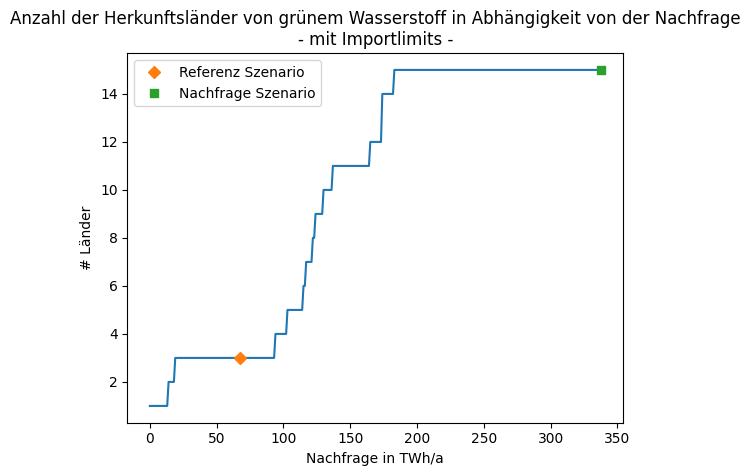

In [19]:
fig, ax = plt.subplots()

ax.set_title("Anzahl der Herkunftsländer von grünem Wasserstoff in Abhängigkeit von der Nachfrage\n- mit Importlimits -")

ax.plot(demand_list_limits_in_twh, countries_list_limits)
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_ylabel("# Länder")
ax.set_xlabel("Nachfrage in TWh/a")
ax.plot(67.5,3, "D", label='Referenz Szenario')
ax.plot(337.5,15, "s", label='Nachfrage Szenario')
ax.legend()
#plt.savefig("Nachfrage - Anzahl Länder - mit Importlimits", bbox_inches="tight")
plt.show()

In [51]:
high_demand_import_limits.instance.display()

Model unknown

  Variables:
    h2_amount_ship : Size=113, Index=h2_amount_ship_index
        Key : Lower : Value             : Upper : Fixed : Stale : Domain
         AE :     0 :               0.0 :  None : False :  True : NonNegativeReals
         AO :     0 :               0.0 :  None : False :  True : NonNegativeReals
         AR :     0 :               0.0 :  None : False :  True : NonNegativeReals
         AT :     0 :               0.0 :  None : False :  True : NonNegativeReals
         AU :     0 :               0.0 :  None : False :  True : NonNegativeReals
         AZ :     0 :               0.0 :  None : False :  True : NonNegativeReals
         BD :     0 :               0.0 :  None : False :  True : NonNegativeReals
         BE :     0 :               0.0 :  None : False :  True : NonNegativeReals
         BF :     0 :               0.0 :  None : False :  True : NonNegativeReals
         BG :     0 :               0.0 :  None : False :  True : NonNegativeReals
         BH

In [5]:
# suppress scientific notation by setting float_format
pd.options.display.float_format = '{:,.2f}'.format

In [7]:
high_demand.results_df.loc[["ES","NO","NL", "MA", "IL"]]

,H2 Schiff,H2 Pipeline,H2 zu NH3 Schiff,H2 zu NH3 Pipeline,H2 für NH3 Umwandlung,H2 zu CH3OH Schiff,H2 zu CH3OH Pipeline,H2 für CH3OH Umwandlung,H2 für Umwandlung,H2 Import,NH3 Schiff,NH3 Pipeline,NH3 Import,CH3OH Schiff,CH3OH Pipeline,CH3OH Import,Gesamter Import
Code,,,,,,,,,,,,,,,,,
ES,0.00,"217,554,613.47",0.00,0.00,0.00,0.00,0.00,0.00,0.00,"217,554,613.47",0.00,0.00,0.00,0.00,0.00,0.00,"217,554,613.47"
NO,0.00,"13,809,824.88",0.00,0.00,0.00,0.00,0.00,0.00,0.00,"13,809,824.88","7,865,214.82",0.00,"7,865,214.82","13,809,824.88",0.00,"13,809,824.88","35,484,864.58"
NL,0.00,"5,108,656.07",0.00,0.00,0.00,0.00,0.00,0.00,0.00,"5,108,656.07",0.00,"2,877,353.94","2,877,353.94",0.00,0.00,0.00,"7,986,010.01"
MA,0.00,"101,026,905.58",0.00,"7,949,919.10","7,949,919.10",0.00,0.00,0.00,"7,949,919.10","108,976,824.68",0.00,0.00,0.00,0.00,0.00,0.00,"108,976,824.68"
IL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,190,175.12",0.00,"3,190,175.12","3,190,175.12"


In [9]:
high_demand_import_limits.results_df[high_demand_import_limits.results_df["Gesamter Import"] >0]

,H2 Schiff,H2 Pipeline,H2 zu NH3 Schiff,H2 zu NH3 Pipeline,H2 für NH3 Umwandlung,H2 zu CH3OH Schiff,H2 zu CH3OH Pipeline,H2 für CH3OH Umwandlung,H2 für Umwandlung,H2 Import,NH3 Schiff,NH3 Pipeline,NH3 Import,CH3OH Schiff,CH3OH Pipeline,CH3OH Import,Gesamter Import
Code,,,,,,,,,,,,,,,,,
AT,0.00,"4,451,900.18",0.00,0.00,0.00,0.00,0.00,0.00,0.00,"4,451,900.18",0.00,0.00,0.00,0.00,0.00,0.00,"4,451,900.18"
BE,0.00,"1,879,368.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,879,368.00",0.00,0.00,0.00,0.00,0.00,0.00,"1,879,368.00"
CZ,0.00,"542,363.08",0.00,0.00,0.00,0.00,0.00,0.00,0.00,"542,363.08",0.00,0.00,0.00,0.00,0.00,0.00,"542,363.08"
DK,0.00,"9,507,925.45",0.00,0.00,0.00,0.00,0.00,0.00,0.00,"9,507,925.45",0.00,0.00,0.00,0.00,0.00,0.00,"9,507,925.45"
FI,0.00,"11,983,359.30",0.00,0.00,0.00,0.00,0.00,0.00,0.00,"11,983,359.30",0.00,0.00,0.00,0.00,0.00,0.00,"11,983,359.30"
HU,0.00,"8,214,387.73",0.00,0.00,0.00,0.00,0.00,0.00,0.00,"8,214,387.73",0.00,0.00,0.00,0.00,0.00,0.00,"8,214,387.73"
IL,"8,819,400.05",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"8,819,400.05",0.00,0.00,0.00,"3,190,175.12",0.00,"3,190,175.12","12,009,575.18"
LT,0.00,"6,984,742.77",0.00,0.00,0.00,0.00,0.00,0.00,0.00,"6,984,742.77",0.00,0.00,0.00,0.00,0.00,0.00,"6,984,742.77"
MA,"155,015,628.35",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"155,015,628.35",0.00,0.00,0.00,0.00,0.00,0.00,"155,015,628.35"


In [10]:
high_demand_import_limits.instance.display()

Model unknown

  Variables:
    h2_amount_ship : Size=113, Index=h2_amount_ship_index
        Key : Lower : Value             : Upper : Fixed : Stale : Domain
         AE :     0 :               0.0 :  None : False : False : NonNegativeReals
         AO :     0 :               0.0 :  None : False : False : NonNegativeReals
         AR :     0 :               0.0 :  None : False : False : NonNegativeReals
         AT :     0 :               0.0 :  None : False : False : NonNegativeReals
         AU :     0 :               0.0 :  None : False : False : NonNegativeReals
         AZ :     0 :               0.0 :  None : False : False : NonNegativeReals
         BD :     0 :               0.0 :  None : False : False : NonNegativeReals
         BE :     0 :               0.0 :  None : False : False : NonNegativeReals
         BF :     0 :               0.0 :  None : False : False : NonNegativeReals
         BG :     0 :               0.0 :  None : False : False : NonNegativeReals
         BH